<a href="https://colab.research.google.com/github/rawa-elargab/Autism-Screening/blob/main/Autism_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autism Spectrum Disorder Screening Classification for Adolescents

Autistic Spectrum Disorder (ASD) is a neurodevelopmental disorder associated with significant healthcare costs, which can be significantly reduced with early detection. Unfortunately, the wait for an ASD diagnosis tends to be a long process, and the procedures are not cost effective. The economic impact of autism, along with the rise in the number of ASD cases worldwide, highlight the urgent need for the development of simple and effective screening methods. As a result, a time-efficient and easily accessible ASD screening is on the horizon to assist health professionals and inform individuals about whether they should pursue formal clinical diagnosis.
The rapid increase in the number of ASD cases worldwide necessitates the creation of datasets pertaining to behavioral traits. However, such datasets are scarce, making thorough analysis to improve the efficiency, sensitivity, specificity, and predictive accuracy of the ASD screening process difficult. There are currently very few autism datasets associated with clinical or screening purposes, and the majority of them are genetic in nature. As a result, we chose to study a new dataset for autism screening of adolescents that contains 20 features that can be used for further analysis to define key autistic traits and improve ASD case classification. 


#Import Dataset

For this Assignment, we selected the Autistic Spectrum Disorder Screening Data for Adolescent Data Set ([link text](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++#)). It is a dataset related to adolescent autism screening that contains 20 features to be used for further analysis, particularly in determining influential autistic traits and improving Autistic Spectrum Disorder case classification. In this dataset, ten behavioral features (AQ-10-Adolescent) are recorded, as well as ten individual characteristics that have been shown in behavior science to be effective in distinguishing ASD cases from controls.

---



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [ ]:
ASD_df = pd.read_csv("/content/gdrive/MyDrive/Assignment 2 - ML/Autism-Adolescent-Data.csv")

del ASD_df['id']
ASD_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,15,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,12,f,?,no,no,AmericanSamoa,no,2,12-16 years,?,NO
3,0,1,1,1,1,1,0,1,1,0,14,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,16,f,?,no,no,Albania,no,7,12-16 years,?,YES


In [ ]:
ASD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         104 non-null    int64 
 1   A2_Score         104 non-null    int64 
 2   A3_Score         104 non-null    int64 
 3   A4_Score         104 non-null    int64 
 4   A5_Score         104 non-null    int64 
 5   A6_Score         104 non-null    int64 
 6   A7_Score         104 non-null    int64 
 7   A8_Score         104 non-null    int64 
 8   A9_Score         104 non-null    int64 
 9   A10_Score        104 non-null    int64 
 10  age              104 non-null    int64 
 11  gender           104 non-null    object
 12  ethnicity        104 non-null    object
 13  jundice          104 non-null    object
 14  austim           104 non-null    object
 15  contry_of_res    104 non-null    object
 16  used_app_before  104 non-null    object
 17  result           104 non-null    in

In [ ]:
ASD_df.shape

(104, 21)

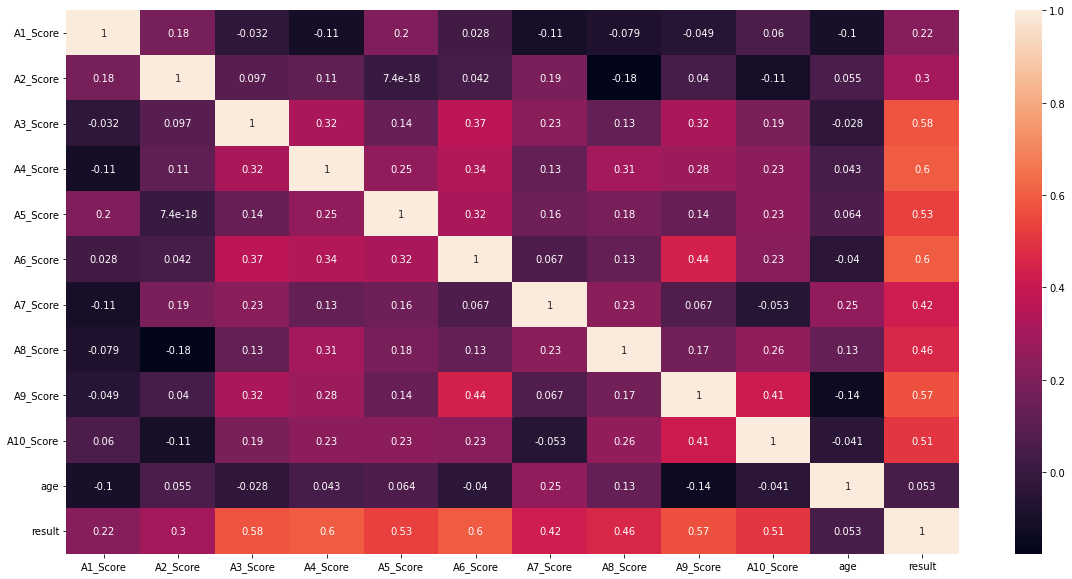

In [ ]:
import seaborn as sns 

plt.figure(figsize = (20,10))
sns.heatmap(data = ASD_df.corr(), annot = True, cbar = True)

#Data Preparation

###Data Cleaning

Some of the rows were marked as “?” in the columns Relation and Ethnicity. Those rows were replaced by “Others” as follows:


In [ ]:
ASD_df = ASD_df.replace("?", "Others")

We converted the boolean values to binary values for the columns: gender, jundice, autism, used_app_before, result and Class/ASD. To do so the following code was used.

In [ ]:
#Converting Booleans to binary

ASD_df = ASD_df.replace("yes", 1)
ASD_df = ASD_df.replace("no", 0)
ASD_df = ASD_df.replace("f", 1)
ASD_df = ASD_df.replace("m", 0)
ASD_df = ASD_df.replace("YES", 1)
ASD_df = ASD_df.replace("NO", 0)

###Data Pre-Processing

There are a number of variables in our dataset that do not contribute to our analysis:


*   ***Used_app_before*** : This variable indicates whether or not a person used the screening application previously. It is not a significant predictor of our target variable, so it will be removed as well.
*  ***Age_desc*** : This variable categorizes an individual's age range. Our dataset contains mainly adolescents, this factor has only one level therefore it is insignificant in our analysis.
*   ***Result*** : the result column is the sum of all A* scores and any result value of 7 or higher is always classified as Class ASD = YES. As a result of including this variable, the machine learning algorithms would essentially already know the outcome of the target variable. It will also be removed for the purposes of this analysis.
*   ***Country_of_res*** : During the initial testing of the classification models, this variable had no significant impact on prediction accuracy. It is too large to be processed by certain classification functions within the R environment because it has more than 60 levels. As a result, it will be removed to ensure compatibility.





In [ ]:
ASD_df = ASD_df.drop(["used_app_before"], axis = 1)
ASD_df = ASD_df.drop(["age_desc"], axis = 1)
ASD_df = ASD_df.drop(["result"], axis = 1)
ASD_df = ASD_df.drop(["contry_of_res"] , axis = 1)

Next, we'll need to convert the Pandas dataframes into numpy arrays that scikit-learn can use. Let's make an array that only contains the feature data we want to work with and another array that only contains the classes (class/ASD).


In [ ]:
#Define X and Y 
X = ASD_df.drop(['Class/ASD'],1)
Y = ASD_df['Class/ASD']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Because some models require normalized input data, we proceed to normalize the attribute data. Preprocessing is used in this case. MinMaxScaler().


In [ ]:
#Normalization using preprocessing.MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = X)
features_minmax_transform[numerical] = scaler.fit_transform(X[numerical])
features_minmax_transform

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,relation
0,0,0,0,1,1,1,1,1,1,0,0.75,0,Hispanic,1,1,Parent
1,0,0,0,0,0,0,0,0,1,1,0.75,0,Black,0,0,Relative
2,0,0,0,0,0,0,0,0,1,1,0.00,1,Others,0,0,Others
3,0,1,1,1,1,1,0,1,1,0,0.50,1,White-European,0,0,Self
4,1,1,1,1,1,1,1,0,0,0,1.00,1,Others,0,0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,1,1,1,0,1,1,0,1,0,1.00,1,Middle Eastern,0,0,Parent
100,1,0,1,0,0,0,0,1,0,1,1.00,0,Asian,0,0,Parent
101,1,0,0,1,1,1,1,1,1,1,0.00,1,White-European,0,0,Self
102,1,1,0,1,1,0,0,0,1,1,0.25,1,White-European,0,0,Self


Our dataset contains non-numeric features such as: ethnicity and relation. Typically, learning algorithms expect input to be numeric, which requires that categorical features be converted. To do so, we use one popular way to convert categorical variables, which is the one-hot encoding scheme that creates a dummy variable for each category of the non-numerical variables.


In [ ]:
#One-Hot-Encoding
features_final = pd.get_dummies(features_minmax_transform)

features_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_South Asian,ethnicity_White-European,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0,0,0,1,1,1,1,1,1,0,0.75,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,1,0.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,1,1,1,1,0,1,1,0,0.50,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,1,1,1,1,1,1,0,0,0,1.00,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
#number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

27 total features after one-hot encoding.


In [ ]:
#Dataframes for Modeling
X_Final = features_final
Y_Final = Y

###Data Exploration

Text(0, 0.5, 'Frequency')

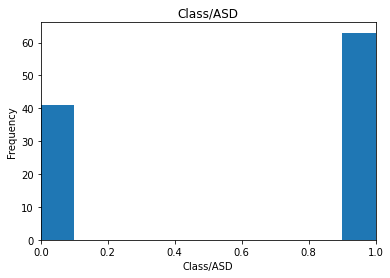

In [ ]:
# histogram of Class/ASD

plt.hist(ASD_df['Class/ASD'], bins=10)
plt.xlim(0,1)
plt.title('Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Frequency')

Dataset has bias. Majority are classified as positive



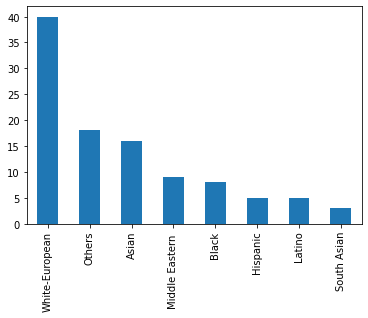

In [ ]:
ASD_df['ethnicity'].value_counts().plot(kind="bar")

plt.show()

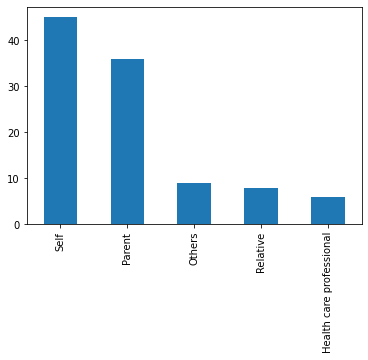

In [ ]:
ASD_df['relation'].value_counts().plot(kind="bar")

plt.show()

In [ ]:
pd.DataFrame(X_Final.corrwith(Y_Final))

,0
A1_Score,0.175731
A2_Score,0.200381
A3_Score,0.488349
A4_Score,0.506677
A5_Score,0.533919
A6_Score,0.445450
A7_Score,0.326410
A8_Score,0.413770
A9_Score,0.401178
A10_Score,0.488349


#Modeling

###Cost Function

The two types of errors are:

*   Type II Error or False positives (FP): Patient wrongly diagnosed with ASD. The cost of this error would take into account the expenses of the unnecessary treatments applied to the patient. The children are typically diagnosed at age 3 and receive a treatment before entering school at age 7. The cost for these 4 years of treatment can be estimated at 240,000 $ 
[link text](https://www.beaconhealthoptions.com/autisms-cost/#:~:text=A%20recent%20study%20estimates%20the,four%20years%20of%20treatment%3A%20%24240%2C000). 

*   Type I error or False negatives (FN): Patient wrongly diagnosed with no ASD. The cost of this error should take into account the treatment costs and compensation for the years where the patient wasn’t correctly diagnosed. We could estimate this cost to be the double of the false positive cost, hence 480,000 $.

\begin{align}
        FP-FN Cost Ratio = \frac{240,000}{480,000} = \frac{1}{2}
    \end{align}
So, in our case, our False Negative Cost is double the False Positive Cost

\begin{align}
        C_{FN} = 2 * C_{FP} 
    \end{align}

From the above values we can conclude the threshold for our model through the folowing relation

\begin{align}
        Threshold = \frac{C_{FP}}{C_{FP}+C_{FN}}
    \end{align}


In [ ]:
def Cost_Function(y_pred , y_test):
  FP = sum(y_pred[y_test == 0] == 1)
  FN = sum(y_pred[y_test == 1] == 0)
  return 240000*FP + 480000*FN

In [ ]:
out = np.zeros((100,10))

###Test Modeling (Without Cross-Validation)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Final, Y_Final, test_size=0.2, stratify = Y_Final)

In [ ]:
from sklearn.linear_model import LogisticRegression

Mod_Log = LogisticRegression()
Mod_Log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred=Mod_Log.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        13

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred.round())

array([[ 8,  0],
       [ 1, 12]])

###Thresholds

In [ ]:
# define 100 thresholds 
thresholds = np.arange(0.33, 1, 0.0067)

###Fold Vector

In [ ]:
n = np.ceil(len(Y_Final) / 10)
fold_vec = np.concatenate([np.arange(10)] * int(n))
fold_vec = fold_vec[0:len(Y_Final)]
np.random.seed(1)
fold_vec = np.random.permutation(fold_vec)



### F1 Scorer

In [ ]:
def get_f1(y_true, y_pred):

  TP = sum(y_pred[(y_true == 1)] == 1)
  FN = sum(y_pred[(y_true == 0)] == 1)
  FP = sum(y_pred[(y_true == 1)] == 0)

  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  
  f1 = 2 * (precision * recall) / (precision + recall)

  return f1


###Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

F1_Scores = np.zeros(10)

for i in range(10):
  test_i = fold_vec == i
  train_i = fold_vec != i
  
  x_test = X_Final.iloc[test_i, :]
  x_train = X_Final.iloc[train_i, :]
  y_test = Y_Final[test_i]
  y_train = Y_Final[train_i]
  
  mod = LogisticRegression()
  mod.fit(x_train, y_train)
  prob = mod.predict_proba(x_test)[:,1]
  
  print(f"F1 Score for the fold no. {i+1} on the test set: {get_f1(y_test, mod.predict(x_test))}")
  F1_Scores[i] = get_f1(y_test,mod.predict(x_test))
  
  for j in range(100):
    y_pred = prob >= thresholds[j]
    cost = Cost_Function(y_pred,y_test)
    out[j][i] = cost

F1 Score for the fold no. 1 on the test set: 1.0
F1 Score for the fold no. 2 on the test set: 0.9090909090909091
F1 Score for the fold no. 3 on the test set: 0.9333333333333333
F1 Score for the fold no. 4 on the test set: 0.9333333333333333
F1 Score for the fold no. 5 on the test set: 0.9473684210526316
F1 Score for the fold no. 6 on the test set: 1.0
F1 Score for the fold no. 7 on the test set: 0.9090909090909091
F1 Score for the fold no. 8 on the test set: 1.0
F1 Score for the fold no. 9 on the test set: 0.8333333333333333
F1 Score for the fold no. 10 on the test set: 1.0


In [ ]:
# CV performance

np.mean(F1_Scores)

0.9465550239234451

In [ ]:
# Min Cost in each fold

results = np.amin(out, axis = 0)
for i in range(10):
  print(f"Min Cost for {i+1} fold is: {results[i]}")

Min Cost for 1 fold is: 0.0
Min Cost for 2 fold is: 0.0
Min Cost for 3 fold is: 0.0
Min Cost for 4 fold is: 0.0
Min Cost for 5 fold is: 0.0
Min Cost for 6 fold is: 0.0
Min Cost for 7 fold is: 240000.0
Min Cost for 8 fold is: 0.0
Min Cost for 9 fold is: 240000.0
Min Cost for 10 fold is: 0.0


In [ ]:
#Optimal Threshold

print("Our Optimal Threshold is:" , round(thresholds[np.argmin(out)],2), "with a cost of:" , np.amin(out))

Our Optimal Threshold is: 0.36 with a cost of: 0.0


In [ ]:
%%shell
jupyter nbconvert --to html /content/Assignment_2_Autism_Screening_Classification.ipynb

[NbConvertApp] Converting notebook /content/Assignment_2_Autism_Screening_Classification.ipynb to html
[NbConvertApp] Writing 479222 bytes to /content/Assignment_2_Autism_Screening_Classification.html
